In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
import numpy as np 
from numpy import random
import scipy.stats as stats
import os
import json
import scipy
import copy 
import scipy.sparse as sparse
from scipy.special import digamma
import time

In [5]:
from matrix_factorization import read

In [6]:
from nonparametric_online import OnlineNPNMF
from nonparametric import simulate, NPNMF
from parametric import HPF

In [34]:
X, theta, beta, s, v = simulate(U = 100,
    D = 100,
    K = 10,
    alpha=1.1,
    beta_shape_prior=0.3,
    beta_rate_prior=0.3,
    s_rate_prior=1.1, seed = 0)

In [35]:
X

array([[ 2,  0,  0, ..., 12,  2,  3],
       [ 1,  1,  0, ...,  0,  1,  0],
       [ 4,  7,  1, ...,  6,  2,  9],
       ...,
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 2,  0,  0, ...,  1,  0,  0],
       [ 1,  1,  0, ...,  3,  0,  0]])

In [36]:
X = scipy.sparse.csr_matrix(X)

In [42]:
hpf = HPF(X ,T = 10, seed = 0, threshold = 1e-5, max_iter = 100)

Using fixed seed 0


In [43]:
hpf.inference(False)

Iter 1: logjoint = -52952.08450555664, last_logjoint = 0
Iter 2: logjoint = -931.9004559994105, last_logjoint = -52952.08450555664
Iter 3: logjoint = 375.0394158417639, last_logjoint = -931.9004559994105
Iter 4: logjoint = 733.510996252633, last_logjoint = 375.0394158417639
Iter 5: logjoint = 885.9859519328957, last_logjoint = 733.510996252633
Iter 6: logjoint = 967.8645293300233, last_logjoint = 885.9859519328957
Iter 7: logjoint = 1019.0509857898032, last_logjoint = 967.8645293300233
Iter 8: logjoint = 1054.466177025678, last_logjoint = 1019.0509857898032
Iter 9: logjoint = 1080.6392809284953, last_logjoint = 1054.466177025678
Iter 10: logjoint = 1100.935021265086, last_logjoint = 1080.6392809284953
Iter 11: logjoint = 1117.3296999755785, last_logjoint = 1100.935021265086
Iter 12: logjoint = 1131.0367118648956, last_logjoint = 1117.3296999755785
Iter 13: logjoint = 1142.8465176710797, last_logjoint = 1131.0367118648956
Iter 14: logjoint = 1153.2939097100461, last_logjoint = 1142.8465

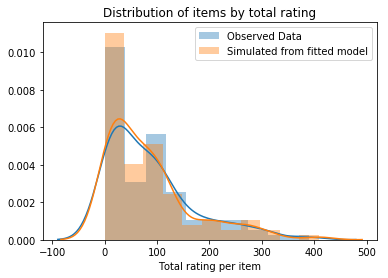

In [51]:
hpf.posterior_check(False)

In [82]:
nmf = NPNMF(X ,T = 15, seed = 0, threshold = 1e-5, max_iter = 100)
nmf.inference()

Using fixed seed 0
logjoint:-98688.90385623364
Iter 1: logjoint = -98688.90385623364, last_logjoint = 0


/home/keane/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/keane/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


logjoint:-95965.81221359652
Iter 2: logjoint = -95965.81221359652, last_logjoint = -98688.90385623364
logjoint:-95689.8551037763
Iter 3: logjoint = -95689.8551037763, last_logjoint = -95965.81221359652
logjoint:-95970.26865890934
Iter 4: logjoint = -95970.26865890934, last_logjoint = -95689.8551037763
logjoint:-96300.6480872618
Iter 5: logjoint = -96300.6480872618, last_logjoint = -95970.26865890934
logjoint:-95782.47524925026
Iter 6: logjoint = -95782.47524925026, last_logjoint = -96300.6480872618
logjoint:-91970.91055317511
Iter 7: logjoint = -91970.91055317511, last_logjoint = -95782.47524925026
logjoint:-81761.9472772721
Iter 8: logjoint = -81761.9472772721, last_logjoint = -91970.91055317511
logjoint:-65063.817325182674
Iter 9: logjoint = -65063.817325182674, last_logjoint = -81761.9472772721
logjoint:-45813.58676451382
Iter 10: logjoint = -45813.58676451382, last_logjoint = -65063.817325182674
logjoint:-26296.550371435675
Iter 11: logjoint = -26296.550371435675, last_logjoint = -

<Figure size 432x288 with 0 Axes>

In [81]:
hpf._beta

array([[1.27398754e-02, 5.38924592e-02, 1.40225948e-02, 5.38924592e-02,
        3.52220721e+00, 5.38924592e-02, 5.38924592e-02, 5.38924592e-02,
        6.65223978e-03, 5.38924592e-02],
       [4.66530708e+00, 7.21208914e-02, 2.31229456e-02, 7.21208914e-02,
        8.27315099e-03, 7.21208914e-02, 7.21208914e-02, 7.21208914e-02,
        9.49189343e-03, 7.21208914e-02],
       [2.61556595e-02, 9.91042278e-02, 9.04934445e-02, 9.91042278e-02,
        8.75240621e-01, 9.91042278e-02, 9.91042278e-02, 9.91042278e-02,
        1.67017629e-02, 9.91042278e-02],
       [2.41774513e-02, 8.85558711e-02, 1.75649742e-02, 8.85558711e-02,
        7.02477566e-02, 8.85558711e-02, 8.85558711e-02, 8.85558711e-02,
        1.31642254e+00, 8.85558711e-02],
       [2.29757077e-02, 8.41378741e-02, 2.70395644e-02, 8.41378741e-02,
        6.30082077e-01, 8.41378741e-02, 8.41378741e-02, 8.41378741e-02,
        8.40945496e-01, 8.41378741e-02],
       [4.39020444e-02, 1.16629308e-01, 6.63100209e-02, 1.16629308e-01,
   

In [67]:
nmf.logjoint()

1229.4964464120294

In [65]:
hpf.logjoint()

1229.4964464120294

In [62]:
nmf._beta = hpf._beta
nmf._theta = hpf._theta

In [58]:
nmf._beta

array([[0.21526838, 0.00032365, 0.00032497, ..., 0.00032497, 0.00032497,
        0.00032497],
       [0.09648973, 0.00032365, 0.00032497, ..., 0.00032497, 0.00032497,
        0.00032497],
       [0.02188414, 0.00032365, 0.00032497, ..., 0.00032497, 0.00032497,
        0.00032497],
       ...,
       [0.24668011, 0.00032365, 0.00032497, ..., 0.00032497, 0.00032497,
        0.00032497],
       [0.05918805, 0.00032365, 0.00032497, ..., 0.00032497, 0.00032497,
        0.00032497],
       [0.12004643, 0.00032365, 0.00032497, ..., 0.00032497, 0.00032497,
        0.00032497]])

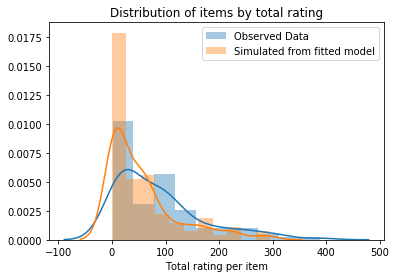

In [50]:
nmf.posterior_check(False)

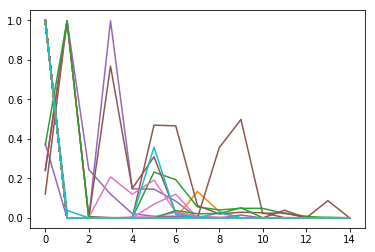

In [59]:
#check if stick breaking is working!
plt.plot(nmf._v.T)
plt.show()

In [ ]:
nmf.posterior_check(False)

In [ ]:
nmf = OnlineNPNMF(X ,T = 15, seed = 0, threshold = 1e-5, max_iter = 10)
#nmf.ELBO()

In [ ]:
time0 = time.time()

In [ ]:
nmf.inference()

In [ ]:
time.time() - time0

In [ ]:
nmf.save_model()

In [ ]:
#check if stick breaking is working!
plt.plot(nmf._v.T)
plt.show()

In [ ]:
#check if stick breaking is working!
plt.plot(nmf._v.T)
plt.show()

In [ ]:
theta = np.array([[nmf._s_shape[u]/nmf._s_rate[u] * nmf._v[u,k] *np.prod(1-nmf._v[u,:k]) for k in range(nmf.T)] for u in range(nmf.U)])
beta = nmf._beta_shape/nmf._beta_rate

In [ ]:
nmf.posterior_check()

In [ ]:
nmf.posterior_check(False)

In [ ]:
#posterior check

ax = sns.distplot(np.sum(X,0),hist=True, kde=True)
sns.distplot(np.sum(simulated,0),hist=True, kde=True)
ax.set_title('Distribution of users by total rating')
ax.set(xlabel='Total rating per user')
ax.legend(['Observed Data', 'Simulated from fitted model'])

In [ ]:
#posterior check

ax = sns.distplot(np.sum(X,1),hist=True, kde=True)
sns.distplot(np.sum(simulated,1),hist=True, kde=True)
ax.set_title('Distribution of users by total rating')
ax.set(xlabel='Total rating per user')
ax.legend(['Observed Data', 'Simulated from fitted model'])

In [ ]:
#posterior check

ax = sns.distplot(np.sum(X,1),hist=True, kde=True)
sns.distplot(np.sum(simulated,1),hist=True, kde=True)
ax.set_title('Distribution of users by total rating')
ax.set(xlabel='Total rating per user')
ax.legend(['Observed Data', 'Simulated from fitted model'])

In [ ]:
#posterior check

ax = sns.distplot(np.sum(X,1),hist=True, kde=True)
sns.distplot(np.sum(simulated,1),hist=True, kde=True)
ax.set_title('Distribution of users by total rating')
ax.set(xlabel='Total rating per user')
ax.legend(['Observed Data', 'Simulated from fitted model'])

In [ ]:
temp = [np.sum([nmf.X[u,d] * (1 - np.sum(nmf._phi[u,d,:])) for d in range(nmf.D)]) for u in range(nmf.U)]

In [ ]:
min(temp)

In [ ]:
nmf.inference()

In [ ]:
A,B,C = nmf.get_ABC()

In [ ]:
A.min(), A.max(), B.min(), B.max(), C.min(),C.max()

In [ ]:
np.where(A == A.min())

In [ ]:
np.where(B == B.min())

In [ ]:
nmf.u

In [ ]:
nmf.load_model('model_1.npz')

In [ ]:
nmf._phi

In [ ]:
np.array([1,2,3])[:2]

In [ ]:
nmf._v.max()

In [ ]:
nmf.save_model(True)

In [ ]:
nmf.load_model('model_1.npz')

In [ ]:
nmf.inference()

In [ ]:
nmf.X[1,:]

In [ ]:
nmf.X

In [ ]:
nmf.X.tocsc()

In [ ]:
time0 = time.time()
for i in range(3000):
    nmf.X[:,np.random.rand(100)]
time.time() - time0

In [ ]:
time0 = time.time()
for i in range(3000):
    nmf.X.tocsc()[np.random.rand(100),:]
time.time() - time0

In [ ]:
time0 = time.time()
for i in range(3000):
    nmf.X.tocsc()[:,np.random.rand(100)]
time.time() - time0

In [ ]:
time0 = time.time()
for i in range(3000):
    nmf.X[np.random.rand(100),:]
time.time() - time0

In [ ]:
nmf.inference()

In [ ]:
len(nmf.byuser)

In [ ]:
for u in range(nmf.U):
    for k in range(nmf.T):
        try:
            nmf.solve_quadratic(A[u,k], B[u,k], C[u,k])
        except:
            print(u,k)
            pass
            

In [ ]:
nmf._s_rate[147]

In [ ]:
np.sum(nmf._beta_shape[:,0]/nmf._beta_rate[:,0])

In [ ]:
list(range(10,15))

In [ ]:
u = 147
k = 0
l = 0
[nmf._v[u,l] * np.prod(1-nmf._v[u,:l])/(1-nmf._v[u,k]) * np.sum(nmf._beta_shape[:,l]/ nmf._beta_rate[:,l]) for l in range(k+1,nmf.T)]
#- np.prod(1-nmf._v[u,:k]) * np.sum(nmf._beta_shape[:,k]/nmf._beta_rate[:,k]) \
#+ nmf.D * nmf.beta_shape_prior/nmf.beta_rate_prior * np.prod(1-nmf._v[u,:]) / nmf._v[u,k]        
                

In [ ]:
A[147,0]

In [ ]:
B[147,0]

In [ ]:
C[147,0]

In [ ]:
A,B,C = nmf.get_ABC()

In [ ]:
(-np.sqrt(B**2 - 4*A*C) - B) / A

In [ ]:
(-np.sqrt(B**2 - 4*A*C) - B) / A

In [ ]:
nmf.inference()

In [ ]:
46318/46350-1

In [ ]:
A = 1.807934296800437e-10
B = 1.0004423587287066
C=  -0.00041595806984341416
(-B + np.sqrt(B**2 - 4*A*C)) / (2 * A)

In [ ]:
from multiprocess import Pool
def f(x,y): return x*y
p = Pool(4)
result = p.map(f, [(1,2), (3,4)])
print(result.get(timeout=1))

In [ ]:
temp = copy.deepcopy(nmf._phi)

In [ ]:
temp

In [ ]:
nmf.inference()

In [ ]:
nmf.solve_quadratic(A= 2.5972095342520613e-16, B=2.052183719154443, C= -1.0518572257929042)

In [ ]:
A = 0.00000000000001
B=2.052183719154443
C= -1.0518572257929042

In [ ]:
(-B + np.sqrt(B**2 - 4*A*C)) / (2 * A)

In [ ]:
nmf.update_phi()
nmf.ELBO()

In [ ]:
nmf.update_items()
nmf.ELBO()

In [ ]:
nmf.update_sticks_scalars()
nmf.ELBO()

In [ ]:
nmf.update_sticks()
nmf.ELBO()

In [ ]:
np.savez('test.npz', a = a, b = a)

In [ ]:
test = np.load('test.npz')

In [ ]:
test['b']

In [ ]:
nmf._phi

In [ ]:
#unit test
def 
def test:
    [nmf._phi[u,d,:].sum() for u,d in nmf.nonzero]

In [ ]:
def validate(theta,beta,rating_valid):
    size = len(list(zip(*rating_valid.nonzero())))
    rating_valid = rating_valid.toarray().flatten()
    mu = (theta @ beta.T).flatten()
    mu = mu[rating_valid > 0]
    rating_valid = rating_valid[rating_valid > 0]
    mu[mu>10] = 10
    assert mu.shape == rating_valid.shape, f'{mu.shape} vs {rating_valid.shape}'
    return (np.sum(rating_valid * np.log(mu)) - np.sum(mu))/size

Variational Inference for Nonparametrics

In [ ]:
rating_train, rating_valid, rating_train, _ = read('./data/movielens')

In [ ]:
kwargs = {'T': 50}

In [ ]:
#NOTE: To be wrapped in def vi(rating_train, rating_valid, **kwargs):

#Use sparse matrix representation
U,D = rating_train.shape
indices = rating_train.indices
indptr = rating_train.indptr
nonzero = list(zip(*rating_train.nonzero()))
byrow = {row:[indices[i] for i in range(indptr[row], indptr[row+1])] for row in range(U)}

rating_csc = rating_train.tocsc()
indices = rating_csc.indices
indptr = rating_csc.indptr
bycol = {col:[indices[i] for i in range(indptr[col], indptr[col+1])] for col in range(D)}

Joint distribution:
$$p(z, \beta, s, v| \alpha, c, a,b) = \prod_{u=1}^{U} p(s_u | \alpha, c) \prod_{k=1}^{\infty} \prod_{u=1}^{U} p(v_{uk} | \alpha)   \prod_{k=1}^{\infty} \prod_{d=1}^{D} p(\beta_{dk} | a, b) \prod_{k=1}^{\infty} \prod_{u=1}^N \prod_{d=1}^D p(z_{udk} | \theta_{uk}, \beta_{dk})$$

Remember the stick proportions:
$$\theta_{uk} = s_u v_{uk} \prod_{i=1}^{k-1}(1-v_{ui})$$

Variational Inference:

$q(s_u) = \text{Gamma}(s_u | \omega_{u,0}, \omega_{u,1})$

$q(v_{uk}) = \zeta_{\tau_{uk}}(v_{uk}) \text{ for } k \leq T, p(v_{uk}) \text{ for } k \geq T + 1$

$q(\beta_{dk}) = \text{Gamma}(\beta_{dk} | \lambda_{ik,0}, \lambda_{dk, 1}) \text { for } k \leq T, p(\beta_{dk}) \text{ for } k \geq T+1$

$q(z_{ud}) = \text{Mult}(z_{ud} | y_{ud}, \phi_{ud})$



In [ ]:
#Starting values
I = 300
T = kwargs.pop('T', 50) #Truncate level
alpha = kwargs.pop('alpha', 0.01)
omega_rate = np.array([0.3]*U) 
omega_shape = np.array([1]*U)
lambda_rate = np.array([[0.3]*T]*U) 
lambda_shape = np.array([[1]*T]*U)
tau = np.random.beta(1, alpha, size = T)
phi = np.zeros((len(nonzero),I))

In [ ]:
class NPNMF:
    def __init__(self, X, K=512, seed=None, **kwargs):
        '''
        BN = LVI_BP_NMF(X, K=512, smoothness=100, seed=None, alpha=2.,
                        a0=1., b0=1., c0=1e-6, d0=1e-6)
        Required arguments:
            X:              U-by-D nonnegative matrix (numpy.ndarray)
                            the data to be factorized
                            Assume scipy sparse matrix format
        Optional arguments:
            K:              the size of the initial dictionary
                            will be truncated to a proper size
            seed:           the random seed to control the random
                            initialization
                            **variational inference can only converge to local
                            optimum, thus try different seeds**
            alpha:          hyperparameter for activation.
            a0, b0:         both must be specified
                            hyperparameters for sparsity
            c0, d0:         both must be specified
                            hyperparameters for Gaussian noise
        '''
        self.X = X.copy()
        self.U, self.D = self.X.shape
        self.T = T
        
        #Working with sparse matrix
        indices = X.indices
        indptr = X.indptr
        self.nonzero = list(zip(*X.nonzero()))
        self.byuser = {row:[indices[i] for i in range(indptr[row], indptr[row+1])] for row in range(U)
        
        self.rating_csc = X.tocsc()
        indices = X.indices
        indptr = X.indptr
        self.byitem = {col:[indices[i] for i in range(indptr[col], indptr[col+1])] for col in range(D)}

        self._parse_args(**kwargs)
        if seed is None:
            print 'Using random seed'
            np.random.seed()
        else:
            print 'Using fixed seed {}'.format(seed)
            np.random.seed(seed)
        self._init()

    def _parse_args(self, **kwargs):
        '''
        Parse the hyperparameters
        '''
        self.alpha = float(kwargs.get('alpha', 2.))
        self.beta_shape_prior = float(kwargs.get('beta_shape_prior', 1.)) #a
        self.beta_rate_prior = float(kwargs.get('beta_rate_prior', 1.))   #b          
        self.s_rate_prior = float(kwargs.get('s_rate_prior', 1e-6))       #c
        
    def initialize(self):
        # variational parameters for Beta 
        self._beta_shape = np.full((self.D, self.T), 0.3)
        self._beta_rate = np.full((self.D, self.T), 0.3)
        
        # variational parameters S 
        self._s_shape = np.full(self.U, 0.3)
        self._s_rate = np.full(self.U, 0.3)
        
        # variational parameters for Z
        self.phi = np.zeros(len(self.nonzero), T)
                       
    def update_phi(self):
        for i,ud in enumerate(nonzero):
            u,d = ud
            elogbeta = [digamma(self._beta_shape[d][k]) - log(self._beta_rate[d][k]) for k in range(self.T)]
            elogs = digamma(self._s_shape[u]) - log(self._s_rate[u])
            phi = [(elogbeta + elogs + self._logpi[u][k]) for k in range(_k)] 
            phi = np.array([phi, self.compute_mult_normalizer_infsum(u)])
            logsum = s.logsum();
            phi.lognormalize(logsum)
            self.phi = phi
    
    def _logpi(self,u,k):
        return exp(lpid[u][_k-1] - log(vd[u][_k-1]) + log(1 - vd[u][_k-1]))
                       
    def elogtheta_at_truncation(self, u):
        elogsu = digamma(self._s_shape[u]) - log(self._s_rate[u])
        elogvt = digamma(1) - digamma(1+self._alpha)
        return elogsu + elogvt + self._logpi[u][_k-1] - log(self._v[u][_k-1]) /
                       + log(1 - self._v[u][_k-1]) #verify this

    def compute_mult_normalizer_infsum(self, u,d, k):
        elogv_t = digamma(self._alpha) - digamma(1+self._alpha)
        return self.elogtheta_at_truncation(u) + digamma(self._beta_shape_prior) - log(self._beta_rate_prior)/
                       - log(1 - exp(elogv_t))

                       
    def update_sticks_scalars(self):
         for u in range(U):
                gamma_shape[u,:] = a1 + rating_train[u,:] @ phi[u,:,:]
                for k in range(K):
                    gamma_rate[u,k] = kappa_shape/kappa_rate[u] + np.sum([lambda_shape[d,k]/lambda_rate[d,k] for d in byrow[u]])
                kappa_rate[u] = a0/b0 + np.sum([gamma_shape[u,k]/gamma_rate[u,k] for k in range(K)])

    def update_sticks(self):
       
    def update_items(self):
        for d in range(D):
                lambda_shape[d,:] = m1 + rating_train[:,d].T @ phi[:,d,:]
                for k in range(K):
                    lambda_rate[d,k] = tau_shape/tau_rate[d] + np.sum([gamma_shape[u,k]/gamma_rate[u,k] for u in bycol[d]])
                tau_rate[d] = m0/n0 + np.sum([lambda_shape[d,k]/lambda_rate[d,k] for k in range(K)])

    def validate(self):
        self.validate()
        theta, beta = gamma_shape/gamma_rate, lambda_shape/lambda_rate
        training_likelihood = validate(theta, beta, rating_train)
        val_likelihood = validate(theta, beta, rating_valid)
        print(f'Iter {n_iter}: training_error = {training_likelihood}, val_error = {val_likelihood}, max_pref = {np.sum(theta,0).max()}, min_pref = {np.sum(theta,0).min()},max_att = {np.sum(beta,0).max()}, min_att = {np.sum(beta,0).min()}')
        if n_iter > 0:
            if abs(val_likelihood/last_val_likelihood-1) < threshold or n_iter >= max_iter:
                print(f'Compete after {n_iter} iterations: Validation Error = {val_likelihood}')
                break
        last_val_likelihood = val_likelihood
        n_iter += 1
                       
    def inference(self):
        self.initialize()
        while True:
            #Update phi
            self.update_phi()
            
            #Update across user
            self.update_sticks_scalars()
            self.update_sticks()
            
            #Update across item
            self.update_items()
            
            #Validate
            self.validate()
    
        

In [ ]:
#CAVI
max_iter = kwargs.pop('max_iter', 10)
threshold = kwargs.pop('threshold', 10e-4)

n_iter = 0 
while True:
    #For each user and item pair, update phi
    time0 = time.time()
    for i,ud in enumerate(nonzero):
        u,d = ud
        phi[i,:] = np.exp([scipy.special.digamma(gamma_shape[u,k]) - np.log(gamma_rate[u,k]) \
                + scipy.special.digamma(lambda_shape[d,k]) - np.log(lambda_rate[d,k]) \
                    for k in range(K)])
        phi[i,:] = phi[i,:] / normalizer

    #Update gamma and kappa
    time1 = time.time()
    for u in range(U):
        gamma_shape[u,:] = a1 + rating_train[u,:] @ phi[u,:,:]
        for k in range(K):
            gamma_rate[u,k] = kappa_shape/kappa_rate[u] + np.sum([lambda_shape[d,k]/lambda_rate[d,k] for d in byrow[u]])
        kappa_rate[u] = a0/b0 + np.sum([gamma_shape[u,k]/gamma_rate[u,k] for k in range(K)])

    #Update lambda and tau
    time2 = time.time()
    for d in range(D):
        lambda_shape[d,:] = m1 + rating_train[:,d].T @ phi[:,d,:]
        for k in range(K):
            lambda_rate[d,k] = tau_shape/tau_rate[d] + np.sum([gamma_shape[u,k]/gamma_rate[u,k] for u in bycol[d]])
        tau_rate[d] = m0/n0 + np.sum([lambda_shape[d,k]/lambda_rate[d,k] for k in range(K)])

    time3 = time.time()
    print(f'Time update phi: {time1 - time0}, Time update gamma and kappa: {time2 - time1}, Time update lambda and tau: {time3 - time2}')

    #Validate
    theta, beta = gamma_shape/gamma_rate, lambda_shape/lambda_rate
    training_likelihood = validate(theta, beta, rating_train)
    val_likelihood = validate(theta, beta, rating_valid)
    print(f'Iter {n_iter}: training_error = {training_likelihood}, val_error = {val_likelihood}, max_pref = {np.sum(theta,0).max()}, min_pref = {np.sum(theta,0).min()},max_att = {np.sum(beta,0).max()}, min_att = {np.sum(beta,0).min()}')
    if n_iter > 0:
        if abs(val_likelihood/last_val_likelihood-1) < threshold or n_iter >= max_iter:
            print(f'Compete after {n_iter} iterations: Validation Error = {val_likelihood}')
            break
    last_val_likelihood = val_likelihood
    n_iter += 1 
np.savez(r'C:\git\PGM\temp.npz', theta = theta, beta = beta)
return theta, beta

In [ ]:
def cavi():
    pass

def sgd():
    pass

def natural_gradient():
    pass

def using_edward():
    pass

def using_pystan():
    pass

def vae():
    pass

def advi():
    pass

if __name__ == "__main__":
    rating_train, rating_valid, rating_test, movie_map = read()
    #rating = np.array([[random.poisson(3) for i in range(2000)] for j in range(100)])
    gibbs(rating_valid, rating_valid,max_iter = 50 )
    
    # model = vi(rating_valid, rating_valid, max_iter = 50)